# Exploring Why Civil Resistance Works

## 1. Exploration of Historical Trends

In [1]:
import pandas as pd

xls = pd.ExcelFile('NAVCO 1.2 Updated.xlsx')

navco = pd.read_excel(xls, 'Sheet1', index_col=None)

In [2]:
freq = navco[['EYEAR', 'VIOL', 'NONVIOL']].groupby('EYEAR').sum()

### Campaign Frequency

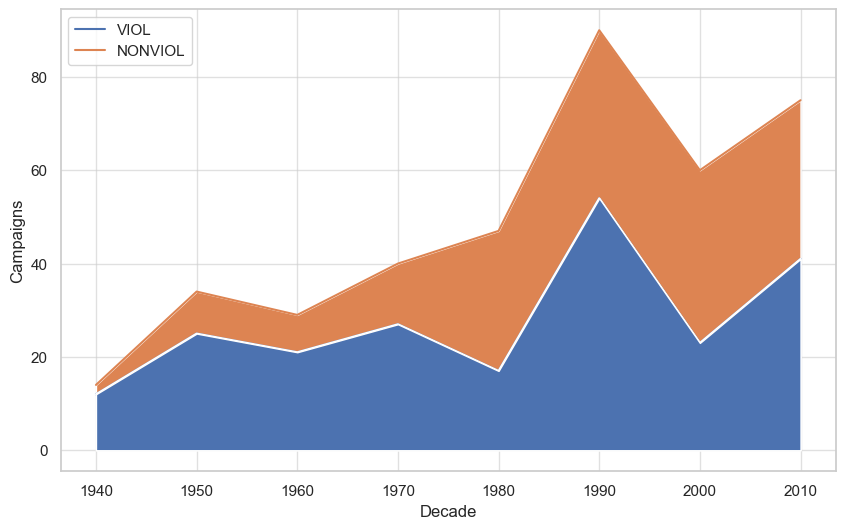

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Create a new DataFrame with the sum of values for each decade
df_decade = freq.groupby(freq.index // 10 * 10).sum()

ax = df_decade.plot(kind='line', figsize=(10, 6), stacked=True, legend=True)

ax.plot(df_decade.index, df_decade['VIOL'], color='white')
ax.grid(alpha=0.6)

ax.fill_between(df_decade.index, df_decade['VIOL'], zorder=2)
ax.fill_between(df_decade.index, df_decade['VIOL'] + df_decade['NONVIOL'], zorder=1)
ax.set_axisbelow(True)

plt.legend(loc='upper left')
plt.xlabel('Decade')
plt.ylabel('Campaigns')
plt.show()

- In general there has been an uprise for non-violent campaigns, but the violent ones, were more over the years.    
- Violent campaigns peak in 1990, up to 45.
- Non-violent peak in 2000, up to almost 40.

### Non-violent campaigns and success rate

In [4]:
navco_nonviol = navco[navco['NONVIOL'] == 1]
navco_nonviol

success = navco_nonviol[['EYEAR', 'NONVIOL', 'SUCCESS']].groupby('EYEAR').sum()
success = success.groupby(success.index // 10 * 10).sum()
success['SUCC_PER'] = success['SUCCESS'] / success['NONVIOL']

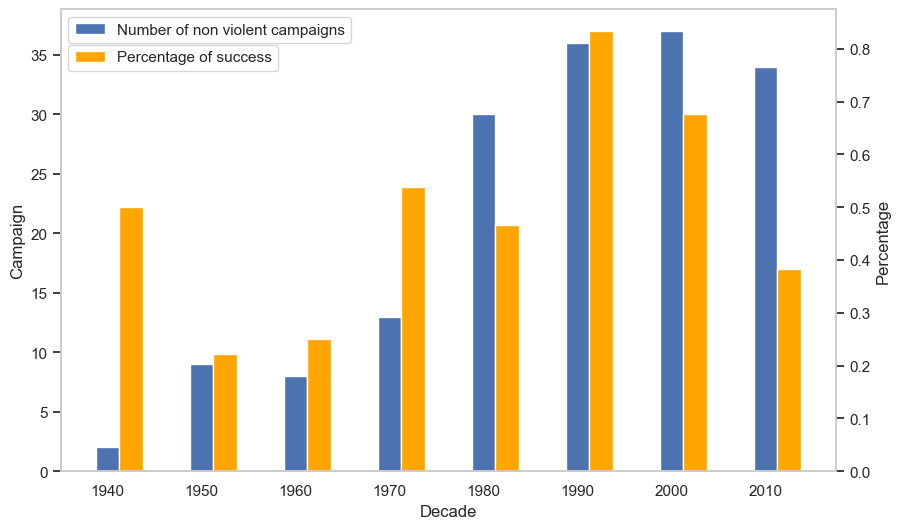

In [5]:
# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the first column on the left y-axis
bar_width = 2.5
bar_left = success.index - bar_width / 2
ax1.bar(bar_left, success['NONVIOL'], width=bar_width, label='Column1', align='edge')
ax1.set_xlabel('Decade')
ax1.set_ylabel('Campaign')
ax1.tick_params('y')

# Plot the second column on the right y-axis
ax2 = ax1.twinx()
ax2.bar(bar_left + bar_width, success['SUCC_PER'], width=bar_width, color='orange', label='Column2', align='edge')
ax2.set_ylabel('Percentage')
ax2.tick_params('y')

# Add legends to explain each color
ax1.legend(['Number of non violent campaigns'], loc='upper left')
ax2.legend(['Percentage of success'],loc='upper left', bbox_to_anchor=(0, 0.94))

ax1.grid(False)
ax2.grid(False)

# Show the plot
plt.show()

- Again, observe the uprise on the number of non-violent campaigns.  
- However, as number of campaigns remains high, the success rate drops after 1990 to **almost half**.

### Violent vs Non-violent campaigns

In [6]:
navco_viol = navco[navco['VIOL'] == 1]

success_viol = navco_viol[['EYEAR', 'VIOL', 'SUCCESS']].groupby('EYEAR').sum()
success_viol = success_viol.groupby(success_viol.index // 10 * 10).sum()
success_viol['VIOL_SUCC_PER'] = success_viol['SUCCESS'] / success_viol['VIOL']

In [7]:
success_all = pd.merge(success, success_viol, left_index=True, right_index=True)
success_all = success_all[['SUCC_PER', 'VIOL_SUCC_PER']]

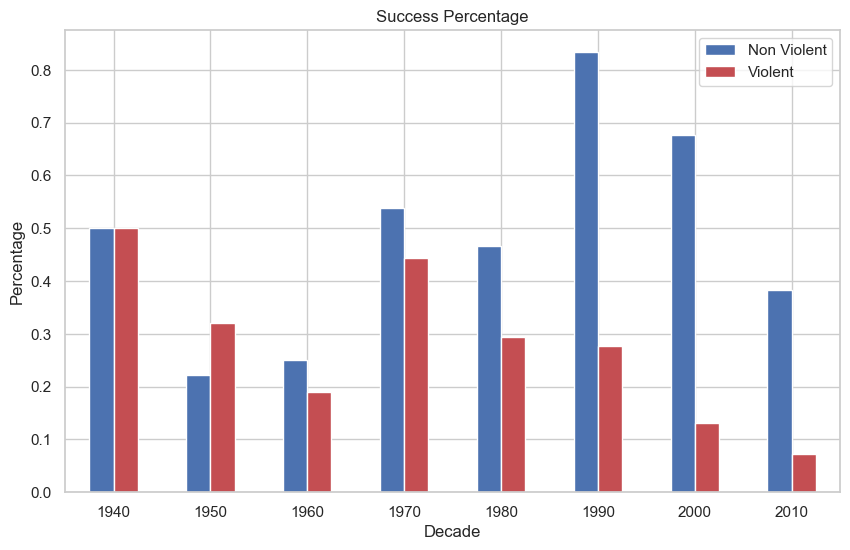

In [8]:
# Plot the DataFrame with two bars for each row
ax = success_all.plot(kind='bar', width=0.5, color=['b', 'r'], figsize=(10, 6), rot=0)

# Set labels and title
ax.set_ylabel('Percentage')
ax.set_xlabel('Decade')
ax.set_title('Success Percentage')
ax.legend(['Non Violent', 'Violent'])

# Show the plot
plt.show()

- Although the first decades both types had similar success rate, from 1970 onwards ***violent success rate drops to 10%*** and ***non-violent remains greater than almost 40%***.  

This line graph shows how much greater were the odds of a Non-violent campaign over a Violent one.

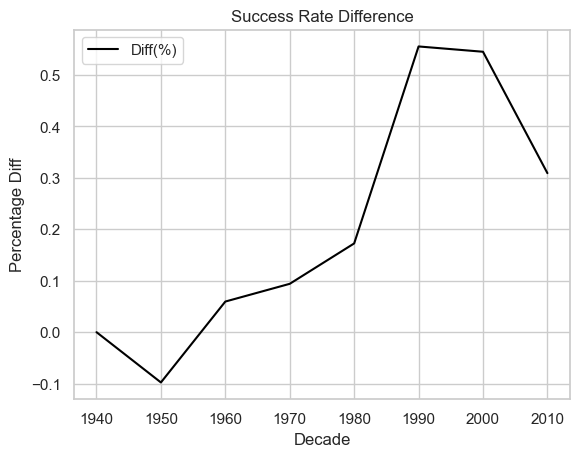

In [9]:
success_all['diff'] = success_all['SUCC_PER'] - success_all['VIOL_SUCC_PER']

plt.title('Success Rate Difference')
plt.ylabel('Percentage Diff')

_ = success_all['diff'].plot(kind='line', color='black', label='Diff(%)')
_ = plt.legend()
_ = plt.xlabel('Decade')

## 2. Largest Resistance Campaigns, 1946-2014

In [10]:
navco2 = navco[['LOCATION', 'CAMPAIGN', 'TARGET', 'EYEAR', 'PERCENTAGE POPULAR PARTICIPATION', 'SUCCESS', 'LIMITED']]
navco_greece = navco2[navco2['LOCATION'] == 'Greece']

navco2 = navco2[navco2['PERCENTAGE POPULAR PARTICIPATION'] > 0.02]

In [11]:
navco2['Campaign'] = navco2['LOCATION'].astype(str) + ': ' + navco2['TARGET'].astype(str)
del navco2['TARGET']
del navco2['LOCATION']
del navco2['CAMPAIGN']

In [12]:
navco2 = navco2.sort_values('PERCENTAGE POPULAR PARTICIPATION', ascending=True)

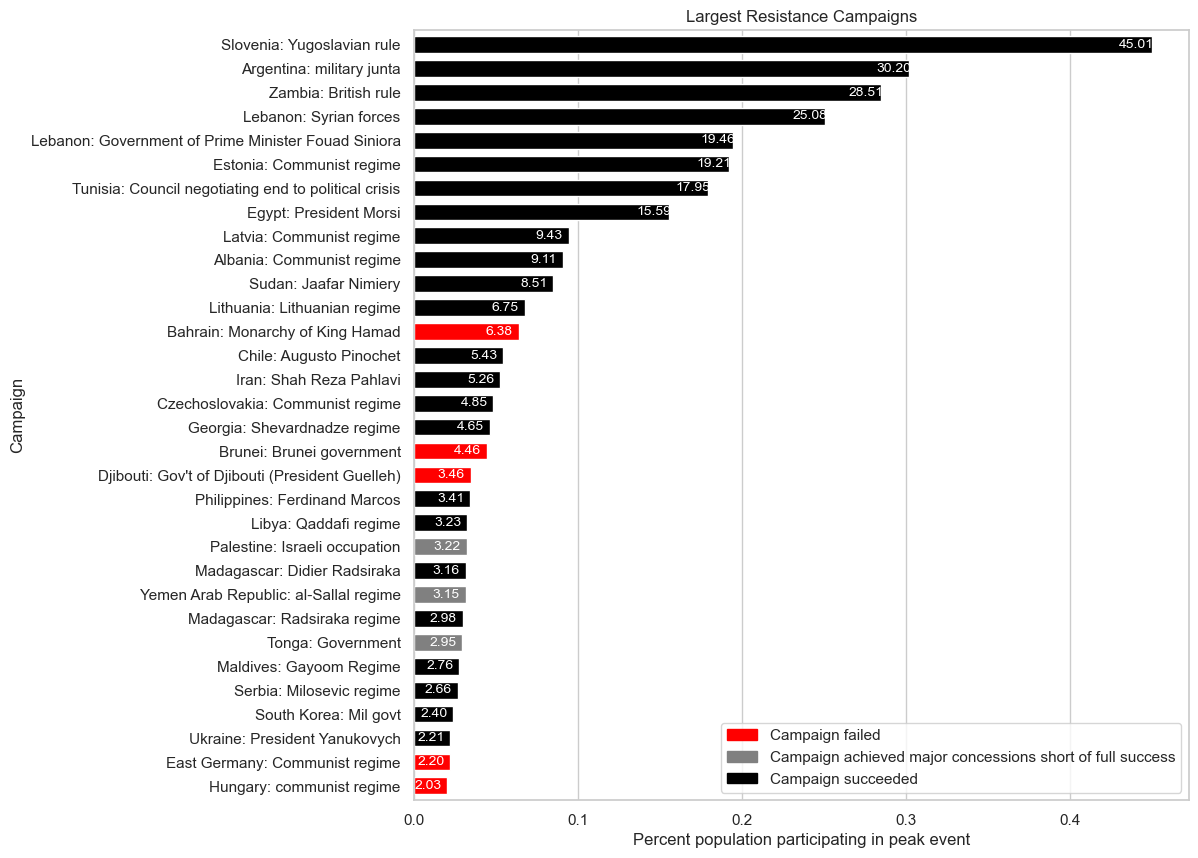

In [13]:
# Section Marker: Largest Resistance Campaigns, 1946-2014
import matplotlib.patches as mpatches

colors = ['grey' if limited_value else ('black' if success_value == 1 else 'red')
          for limited_value, success_value in zip(navco2['LIMITED'], navco2['SUCCESS'])]

ax = navco2.plot(x='Campaign', y='PERCENTAGE POPULAR PARTICIPATION', kind='barh', color=colors,
            width= 0.7, figsize=(10, 10))

plt.xlabel('Percent population participating in peak event')
plt.ylabel('Campaign')
plt.title('Largest Resistance Campaigns')

ax.yaxis.grid(False)

for index, value in enumerate(navco2['PERCENTAGE POPULAR PARTICIPATION']):
    x_coord = value - 0.02
    ax.text(x_coord, index, f'{value*100:.2f}', color='white', va='center', fontsize=10)

r = mpatches.Patch(color='red', label='Campaign failed')
g = mpatches.Patch(color='grey', label='Campaign achieved major concessions short of full success')
b = mpatches.Patch(color='black', label='Campaign succeeded')
plt.legend(handles=[r,g,b], loc='lower right')

# Show the plot
plt.show()

- For participation greater than 2%, the **overall success rate is 84%**  
(counting grey bars as a success to simplify this)

- We can observe 100% success rate for participation of at least 6,75% 

## 2.1 About Greece

### Greek civil war: 1946-49
https://en.wikipedia.org/wiki/Greek_Civil_War

The Greek Civil War took place from 1946 to 1949. The conflict, which erupted shortly after the end of World War II, consisted of a communist-dominated uprising against the established government of the Kingdom of Greece. The opposition declared a people's republic, the Provisional Democratic Government of Greece, which was governed by the Communist Party of Greece (KKE) and its military branch, the Democratic Army of Greece (DSE). The rebels were supported by Yugoslavia and the Soviet Union. With the support of the United Kingdom and United States, the Greek government forces ultimately prevailed.

In [14]:
from IPython.display import HTML

# Replace 'image_url1' and 'image_url2' with the actual URLs of the images you want to display
image_url2 = 'https://upload.wikimedia.org/wikipedia/commons/thumb/4/41/Vladina_edinica%2C_Gradjanska_vojna_vo_Grcija.jpg/370px-Vladina_edinica%2C_Gradjanska_vojna_vo_Grcija.jpg'

# Set the desired width and height for the images
image_width = 700
image_height = 500

# Create an HTML string with image tags and size attributes
html_str = (
    f'<img src="{image_url2}" alt="Image 1" width="{image_width}" height="{image_height}">'
)

# Display the HTML string
HTML(html_str)

img source: https://en.wikipedia.org/wiki/File:Vladina_edinica,_Gradjanska_vojna_vo_Grcija.jpg

### Greek anti-military (Athens Polytechnic uprising): 1973-74
https://en.wikipedia.org/wiki/Athens_Polytechnic_uprising

The Athens Polytechnic uprising occurred in November 1973 as a massive student demonstration of popular rejection of the Greek military junta of 1967–1974. It began on 14 November 1973, escalated to an open anti-junta revolt, and ended in bloodshed in the early morning of 17 November after a series of events starting with a tank crashing through the gates of the Athens Polytechnic.

In [15]:
# Replace 'image_url1' and 'image_url2' with the actual URLs of the images you want to display
image_url1 = 'https://upload.wikimedia.org/wikipedia/commons/thumb/d/d1/Athens_Polytechnic_1973.png/300px-Athens_Polytechnic_1973.png'

# Set the desired width and height for the images
image_width = 700
image_height = 500

# Create an HTML string with image tags and size attributes
html_str = (
    f'<img src="{image_url1}" alt="Image 1" width="{image_width}" height="{image_height}">'
)

# Display the HTML string
HTML(html_str)

img source: https://en.wikipedia.org/wiki/File:Athens_Polytechnic_1973.png

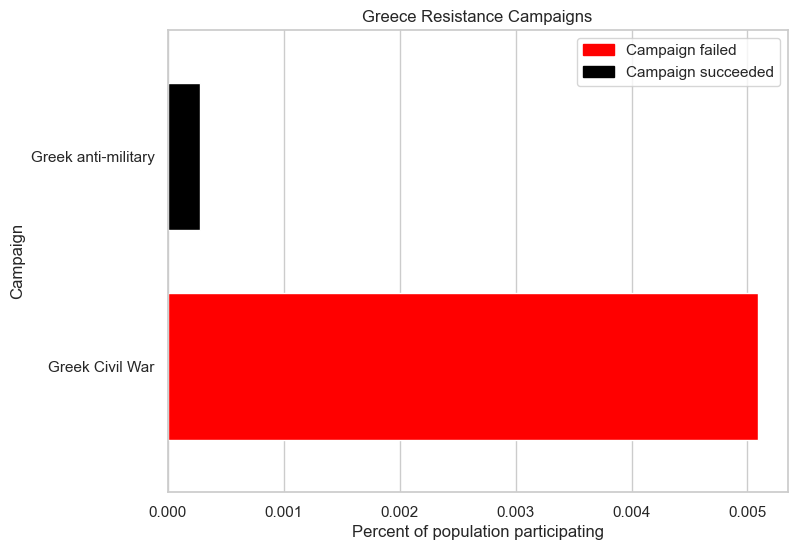

In [16]:
colors = ['grey' if limited_value else ('black' if success_value == 1 else 'red')
          for limited_value, success_value in zip(navco_greece['LIMITED'], navco_greece['SUCCESS'])]

ax = navco_greece.plot(x='CAMPAIGN', y='PERCENTAGE POPULAR PARTICIPATION', kind='barh', color=colors,
            width= 0.7, figsize=(8, 6))

plt.xlabel('Percent of population participating')
plt.ylabel('Campaign')
plt.title('Greece Resistance Campaigns')

ax.yaxis.grid(False)
r = mpatches.Patch(color='red', label='Campaign failed')
b = mpatches.Patch(color='black', label='Campaign succeeded')
plt.legend(handles=[r,b], loc='upper right')

# Show the plot
plt.show()

## 3. The Effect of Participation on the Probability of Campaign Success

According to [Nonviolent and Violent Campaigns and Outcomes (NAVCO) Dataset](https://dataverse.harvard.edu/dataverse/navco), and in particular the [NAVCO 1.1 Dataset](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/YLLHEE),  
Membership per Capita is defined as:  
$$ MPC = \frac{ln(participation)}{ln(population)} $$

For the calculations below:
- Logged_Pop = $ ln(population) $
- Logged_Part = $ ln(participation) $
- Logged_Per_Pop = $ ln(percentage$ $of$ $participation)$

In [17]:
import numpy as np

navco3 = navco[['SUCCESS', 'PARTICIPATION', 'PERCENTAGE POPULAR PARTICIPATION']].copy()
navco3 = navco3[navco3['PERCENTAGE POPULAR PARTICIPATION'] != 0.0]

navco3['Logged_Pop'] = np.log(navco3['PARTICIPATION'] / navco3['PERCENTAGE POPULAR PARTICIPATION'])
navco3['Logged_Per_Pop'] = np.log(navco3['PERCENTAGE POPULAR PARTICIPATION'])
navco3['Logged_Part'] = np.log(navco3['PARTICIPATION'])
navco3.rename(columns={'PERCENTAGE POPULAR PARTICIPATION': 'PPP'}, inplace=True)
navco3['MPC'] = np.log(navco3['PARTICIPATION']) / navco3['Logged_Pop']

In [18]:
from statsmodels.formula.api import logit

regression = logit("SUCCESS ~ MPC + Logged_Pop", data=navco3)
logit_results = regression.fit()

logit_results.summary2()

Optimization terminated successfully.
         Current function value: 0.580756
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Method:           MLE       
Dependent Variable: SUCCESS          Pseudo R-squared: 0.130     
Date:               2023-12-04 22:14 AIC:              447.3747  
No. Observations:   380              BIC:              459.1952  
Df Model:           2                Log-Likelihood:   -220.69   
Df Residuals:       377              LL-Null:          -253.58   
Converged:          1.0000           LLR p-value:      5.1893e-15
No. Iterations:     6.0000           Scale:            1.0000    
------------------------------------------------------------------
                Coef.   Std.Err.     z     P>|z|    [0.025  0.975]
------------------------------------------------------------------
Intercept      -2.8142    1.4961  -1.8811  0.0600  -5.7465  0.1180
MPC             7.6475    1.1664   6.5563  0.0000   5.3613  9.9336
Logged_Pop     -0.1388    0.0736  -1.8871  0.0591  -0.2830  0.0054
=================================================================

"""

The outcomes of this summary:

Pseudo R-squared is 0.130, which may correspond to a good model, as its McFadden's pseudo-$R^2$ 
- Holding Logged_Pop on a fixed value, one additional percent of **MPC** will increase the log-odds by 7.6475,  
so the odds are multiplied by: 
$$ e^{7.6475} \approx 2095.4005 $$  
approximately 209.400% better odds, so MPC is **strongly associated** with the probability of succeeding on a campaign.  
The ***p-value*** of MPC is **0**, meaning this is a good indicator for success and the results are statistically significant.

- Holding MPC on a fixed value, one additional percent of **Logged_pop** will decrease the log-odds by 0.1388,  
so the odds are multiplied by:
$$ e^{-0.1388} \approx 0.8704021 $$   
approximately 13% lower odds, ***a less significant result***, comparing to the MPC.   
The variable is not a good predictor for success, since **p-value** is **0.059** (acceptable threshold 0.05).


- Intercept is the log-odds of success when all other variables are down to zero.

#### Two variables plot

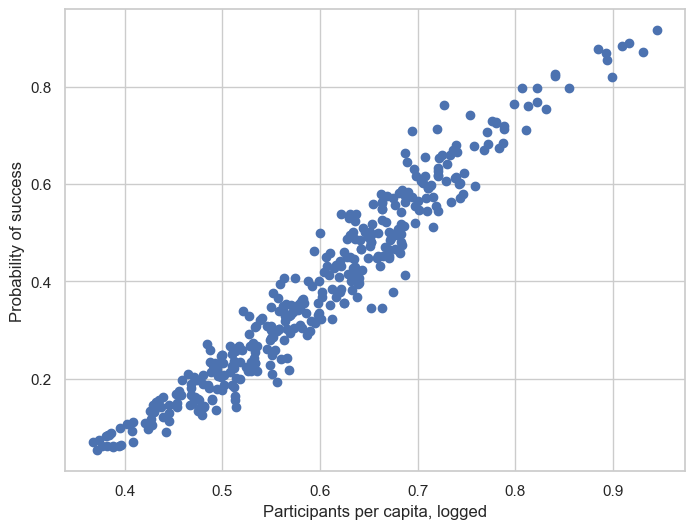

In [19]:
x = navco3['MPC']
x = x.dropna()

y = logit_results.predict(navco3[['MPC', 'Logged_Pop']])

plt.figure(figsize=[8,6])
plt.ylabel('Probability of success')
plt.xlabel('Participants per capita, logged')
_ = plt.scatter(x,y)

- The scatterplot appears to be like a straight line, as expected.   
Thats because our model **indicates strong correlation** between MPC and the odds of success.  
(In particular, 1% increase on MPC will increase the odds for success 209.400%)  

- However, the shape is not a perfect line, propably because there are 2 variables in the model for y.

In [20]:
regression = logit("SUCCESS ~ MPC", data=navco3)
logit_results2 = regression.fit()

logit_results2.summary2()

Optimization terminated successfully.
         Current function value: 0.585556
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Method:           MLE       
Dependent Variable: SUCCESS          Pseudo R-squared: 0.123     
Date:               2023-12-04 22:14 AIC:              449.0222  
No. Observations:   380              BIC:              456.9026  
Df Model:           1                Log-Likelihood:   -222.51   
Df Residuals:       378              LL-Null:          -253.58   
Converged:          1.0000           LLR p-value:      3.2041e-15
No. Iterations:     6.0000           Scale:            1.0000    
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept     -5.3469    0.7095  -7.5362  0.0000  -6.7375  -3.9563
MPC            8.0495    1.1414   7.0524  0.0000   5.8125  10.2866
=================================================================

"""

The outcomes of this summary:

Pseudo R-squared is 0.123, a little worse than before. 
- One additional percent of **MPC** will increase the log-odds by 8.0495,  
so the odds are multiplied by: 
$$ e^{8.0495} \approx 3132.2285 $$  
approximately 313.100% better odds, so MPC's association with the probability of success is even stronger.  
The ***p-value*** of MPC is **0**, meaning this is a good indicator for success and the results are statistically significant.

- Intercept is the log-odds of success when all other variables are down to zero.

#### One variable plot

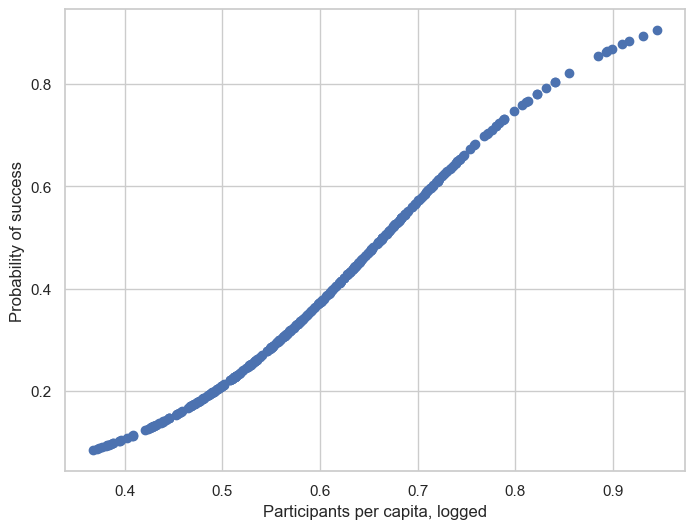

In [21]:
x = (navco3['MPC'])
x = x.dropna()

y = logit_results2.predict(navco3['MPC'])

plt.figure(figsize=[8,6])
plt.ylabel('Probability of success')
plt.xlabel('Participants per capita, logged')
_ = plt.scatter(x,y)

- This one is a much smoother Sigmoid curve, probably because this time the model uses only 1 variable.  


- When you introduce a second variable, the relationship between variables might add complexity. 

MPC is calculated from Logged_pop indicating an obvious **correlation** between the two variables.  
Statistically speaking:

In [22]:
spearman_corr = navco3['MPC'].corr(navco3['Logged_Pop'], method='spearman')
kendall_corr = navco3['MPC'].corr(navco3['Logged_Pop'], method='kendall')
print('Spearman correlation: ' + str(spearman_corr))
print('Kendall correlation: ' + str(kendall_corr))

Spearman correlation: -0.2556831281643881
Kendall correlation: -0.17447166325549177


The variables are indeed correlated, which probably leads to **multicollinearity issues**.  

Also it seems that the 2 variables are on **different scales**:

In [23]:
navco3[['MPC','Logged_Pop']].describe()

,MPC,Logged_Pop
count,380.000000,380.000000
mean,0.597982,16.619059
std,0.115082,1.688652
min,0.367726,11.403144
25%,0.512279,15.517619
50%,0.592770,16.497664
75%,0.676306,17.700985
max,0.944982,21.040705


- mean: 0.59 - 16.6  
- std: 0.11 - 1.6  

Both of these seem to affect the results of the first scatterplot.

## 4. The Level of Participation Tipping Point

### Explaining the 3.5% rule

In [24]:
navco4 = navco[['PERCENTAGE POPULAR PARTICIPATION', 'SUCCESS']].copy()

In [25]:
bins = [-float('inf'), 0.000035, 0.00015, 0.0006, 0.0025, 0.01, 0.035, float('inf')]
labels = ['less than 0.0035%', '0.0035% - 0.015%', '0.015% - 0.06%', '0.06% - 0.25%', 
          '0.25% - 1.0%', '1.0% - 3.5%', 'greater than 3.5%']

navco4['Peak Popular Participation (%)'] = pd.cut(navco4['PERCENTAGE POPULAR PARTICIPATION'], 
                                                  bins=bins, labels=labels, include_lowest=True)

navco4 = navco4[navco4['PERCENTAGE POPULAR PARTICIPATION'] != 0.0]

In [26]:
ptp = navco4.groupby('Peak Popular Participation (%)', observed=False).count().sort_values(
    ['Peak Popular Participation (%)'], ascending=False)
del ptp['PERCENTAGE POPULAR PARTICIPATION']

In [27]:
ptp2 = navco4.groupby('Peak Popular Participation (%)', observed=False).sum().sort_values(
    ['Peak Popular Participation (%)'], ascending=False)
del ptp2['PERCENTAGE POPULAR PARTICIPATION']

In [28]:
ptp['Success Rate'] = (((ptp2 / ptp) * 100).round(2)).map('{:.2f}%'.format)

In [29]:
ptp.rename(columns={'SUCCESS': 'Observations'}, inplace=True)
ptp

,Observations,Success Rate
Peak Popular Participation (%),,
greater than 3.5%,18,88.89%
1.0% - 3.5%,41,60.98%
0.25% - 1.0%,92,45.65%
0.06% - 0.25%,95,45.26%
0.015% - 0.06%,66,24.24%
0.0035% - 0.015%,44,9.09%
less than 0.0035%,24,4.17%


From this table, we can see that for 3.5% and more, a 89% success rate appears.  
Thats because 16/18 observations are successful. From the [figure of Question 2](#2.-Largest-Resistance-Campaigns,-1946-2014), see that the 2 failures were at **Brunei** and **Bahrain**.

[Erica Chenoweth. 4/20/2020. “Questions, Answers, and Some Cautionary Updates Regarding the 3.5% Rule.” Carr Center Discussion Paper Series, 2020-005](https://carrcenter.hks.harvard.edu/files/cchr/files/CCDP_005.pdf)
According to this paper,  


"The rule might be somewhat qualifed by these two cases. The 3.5% rule may not apply in **Brunei** and **Bahrain** or countries    
like them—small monarchies with access to overwhelmingforeign military reinforcement. But these are rare and unique national  profles, and—for now—the rule appears to persist in all other cases." 

- As we can see in the Largest Resistance Campaigns ([figure of Question 2](#2.-Largest-Resistance-Campaigns,-1946-2014)), Djibouti **failed with a participation rate of 3,46%**.  
- After that, meaning **3,5% participation and higher**, all campaigns have succeeded, **except** for Brunei and Bahrain, to which  
the rule doesn't apply, according to the author.

Excluding these 2 we have a **100% success rate** for participation of 3,5% and higher.

### Tipping point for success in a campaign with 99% probability

Plot the logistic regression of [question 3](#One-variable-plot) with **one variable (MPC)**, with confidence interval upper and lower bounds.

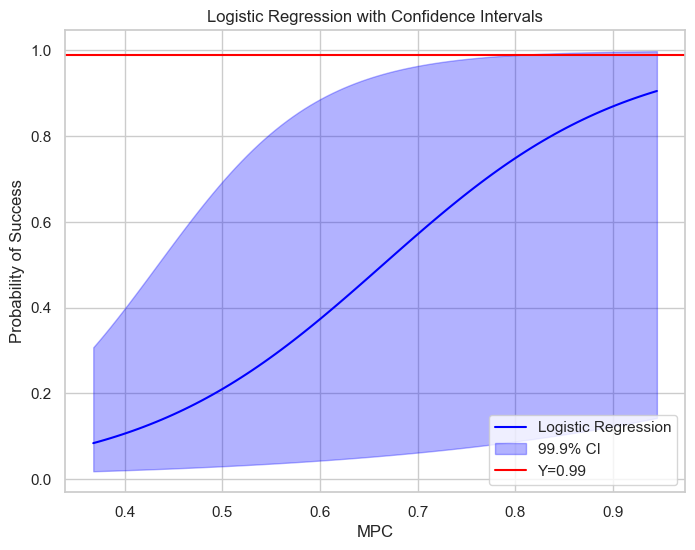

In [30]:
import warnings
warnings.filterwarnings("ignore")

coef = logit_results2.params
cov_matrix = logit_results2.cov_params()

x = np.linspace(navco3["MPC"].min(), navco3["MPC"].max(), 100)
log_odds = coef['Intercept'] + coef['MPC'] * x

std_errors = np.sqrt(np.sum((x[:, np.newaxis] * cov_matrix.iloc[1, 1])**2, axis=1))

z_value_999 = 3.29
upper_ci = log_odds + z_value_999 * std_errors
lower_ci = log_odds - z_value_999 * std_errors

# Transform log odds to probabilities
probs = 1 / (1 + np.exp(-log_odds))
upper_probs = 1 / (1 + np.exp(-upper_ci))
lower_probs = 1 / (1 + np.exp(-lower_ci))

plt.figure(figsize=(8, 6))
sns.lineplot(x=x, y=probs, color='blue', label='Logistic Regression')
plt.fill_between(x, lower_probs, upper_probs, color='blue', alpha=0.3, label='99.9% CI')

plt.axhline(y=0.99, color='red', label='Y=0.99')

plt.xlabel('MPC')
plt.ylabel('Probability of Success')
plt.title('Logistic Regression with Confidence Intervals')
plt.legend()
plt.show()

As we can see from the upper bound, to reach 0.99 success rate, we need **MPC** to be at **0.8**

Now we need to find the actual percentage of participation, given $\small MPC=0.8$.  
From our NAVCO dataset the records closer to 0.8 are:

In [31]:
navco3[navco3['MPC'] >= 0.79].sort_values(by='MPC').head(3)

,SUCCESS,PARTICIPATION,PPP,Logged_Pop,Logged_Per_Pop,Logged_Part,MPC
115,1,200000.0,0.046501,15.274358,-3.068285,12.206073,0.799122
19,0,100000.0,0.063816,14.264669,-2.751744,11.512925,0.807094
266,1,2000000.0,0.034130,17.886245,-3.377588,14.508658,0.811163


So the record with MPC closest to 0.8: 

In [32]:
navco3[navco3['MPC'] >= 0.8].sort_values(by='MPC').head(1)[['MPC', 'PPP']]

,MPC,PPP
19,0.807094,0.063816


has a participation percentage of **0.063816 or 6% of the population**, a little higher than Chenoweth's estimation.

## 5. Nonviolent Resistance and Target Regime Type

In [33]:
xls = pd.ExcelFile('p5v2018.xls')

p5v = pd.read_excel(xls, 'p5v2018', index_col=None)
p5v.rename(columns={'country': 'LOCATION'}, inplace=True)
p5v.rename(columns={'year': 'EYEAR'}, inplace=True)

In [34]:
full_table = pd.merge(navco, p5v, how='inner', on=['LOCATION', 'EYEAR'])

In [35]:
full_table = full_table[['SUCCESS','NONVIOL', 'polity2', 'PERCENTAGE POPULAR PARTICIPATION', 'PARTICIPATION']]
full_table['Logged_Pop'] = np.log(full_table['PARTICIPATION'] / full_table['PERCENTAGE POPULAR PARTICIPATION'])
full_table['Logged_Part'] = np.log(full_table['PARTICIPATION'])

In [36]:
full_table.dropna(inplace=True)

In [37]:
# Regression
regression = logit("SUCCESS ~ NONVIOL + polity2 + Logged_Part + Logged_Pop", data=full_table)
logit_results = regression.fit()

logit_results.summary2()

Optimization terminated successfully.
         Current function value: 0.536938
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Method:           MLE       
Dependent Variable: SUCCESS          Pseudo R-squared: 0.203     
Date:               2023-12-04 22:14 AIC:              328.9411  
No. Observations:   297              BIC:              347.4098  
Df Model:           4                Log-Likelihood:   -159.47   
Df Residuals:       292              LL-Null:          -199.97   
Converged:          1.0000           LLR p-value:      1.0749e-16
No. Iterations:     6.0000           Scale:            1.0000    
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept      1.8727    1.4980   1.2501  0.2113  -1.0634   4.8087
NONVIOL        0.8662    0.2951   2.9355  0.0033   0.2879   1.4445
polity2        0.0522    0.0254   2.0573  0.0397   0.0025   0.1020
Logged_Part    0.4367    0.0901   4.8493  0.0000   0.2602   0.6132
Logged_Pop    -0.4270    0.0988  -4.3212  0.0000  -0.6207  -0.2333
=================================================================

"""

The outcomes of this summary:

Pseudo R-squared is 0.203, which probably corresponds to a good model, as its McFadden's pseudo-$R^2$  
All ***p-values*** are lower than **0.05**, meaning they are good indicators for success and the results are statistically significant.
  
- Holding everything on a fixed value, one additional percent of **NONVIOL** on the campaign will increase the log-odds by 0.8662,  
so the odds are multiplied by:
$$ e^{0.8662} \approx 2.377858 $$  
  
approximately 137% greater odds, meaning a strong correlation between NONVIOL and SUCCESS.
             
- Holding everything on a fixed value, one additional percent of **polity2** will increase the log-odds by 0.0522,  
so the odds are multiplied by:      
  
$$ e^{0.0522} \approx 1.0535864 $$  
approximately 5% greater odds, a less significant result.   
  
- Holding everything on a fixed value, one additional percent of **Logged_Part** will increase the log-odds by 0.4367,  
so the odds are multiplied by:      
  
$$ e^{0.4367} \approx 1.5475917 $$  
which means approximately 54% greater odds, the most significant correlation so far.  
  
- Holding everything on a fixed value, one additional percent of **Logged_Pop** will decrease the log-odds by 0.4270,  
so the odds are multiplied by:      
  
$$ e^{-0.4270} \approx 0.6524636 $$  
which means approximately 35% lower odds, a significant result.  
  
- **Intercept** is the log-odds of success when all other variables are down to zero.